In [ ]:
from langchain_openai import ChatOpenAI
import pandas as pd
import h2o
import os
import yaml

from aeroml_data_science_team.ml_agents import H2OMLAgent

# DATA
df = pd.read_csv("datasets/churn_data.csv")

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [25]:
# LLM API KEY
# os.environ['OPENAI_API_KEY'] = "your_api_key"
# os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

with open('config/credentials.yml', 'r') as file:
    config = yaml.safe_load(file)

os.environ["OPENAI_API_KEY"] = config['openai']['OPENAI_API_KEY']


# Define constants for model, logging, and paths
MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "ai_functions/")
MODEL_PATH = os.path.join(os.getcwd(), "h2o_models/")

# Initialize the language model
llm = ChatOpenAI(model=MODEL)
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000017FB96ACE10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000017FBDC202D0>, root_client=<openai.OpenAI object at 0x0000017FB94B9FD0>, root_async_client=<openai.AsyncOpenAI object at 0x0000017FB8D9CD50>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

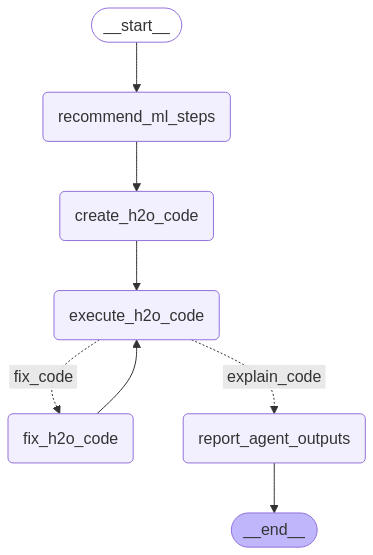

In [5]:
# CREATE THE AGENT
ml_agent = H2OMLAgent(
    model=llm, 
    log=True, 
    log_path=LOG_PATH,
    model_directory=MODEL_PATH, 
)
ml_agent

In [ ]:
# RUN THE AGENT
ml_agent.invoke_agent(
    data_raw=df.drop(columns=["customerID"]),
    user_instructions=(
        "Please do classification on 'Churn'. Use a max runtime of 30 seconds."
    ),
    target_variable="Churn")

---H2O ML AGENT----
    * RECOMMEND MACHINE LEARNING STEPS
    * CREATE H2O AUTOML CODE
      File saved to: c:\Users\alpha\Documents\Side Project\AI Agents\ai-model-pipeline\ai_functions/h2o_automl.py
    * EXECUTING AGENT CODE
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.3+7-LTS-152, mixed mode, sharing)
  Starting server from C:\Users\alpha\Documents\Side Project\AI Agents\ai-model-pipeline\env\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\alpha\AppData\Local\Temp\tmp2_kaosnz
  JVM stdout: C:\Users\alpha\AppData\Local\Temp\tmp2_kaosnz\h2o_Alpha_Chong_started_from_python.out
  JVM stderr: C:\Users\alpha\AppData\Local\Temp\tmp2_kaosnz\h2o_Alpha_Chong_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version fr

H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kuala_Lumpur
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 5 days
H2O_cluster_name:,H2O_from_python_Alpha_Chong_x1m1h6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.943 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:51:34.453: Stopping tolerance set by the user is < 70% of the recommended default of 0.011915743770127944, so models may take a long time to converge or may not converge at all.
00:51:34.469: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
    * REPORT AGENT OUTPUTS


c:\Users\alpha\Documents\Side Project\AI Agents\ai-model-pipeline\env\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [7]:
# Retrieve and display the leaderboard of models
ml_agent.get_leaderboard()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,StackedEnsemble_BestOfFamily_1_AutoML_1_202503...,0.849199,0.412075,0.660924,0.229989,0.365594,0.133659
1,StackedEnsemble_AllModels_2_AutoML_1_20250308_...,0.849092,0.411994,0.663707,0.227680,0.365531,0.133613
2,StackedEnsemble_BestOfFamily_2_AutoML_1_202503...,0.849060,0.412210,0.661540,0.229782,0.365650,0.133700
3,StackedEnsemble_BestOfFamily_3_AutoML_1_202503...,0.848990,0.412171,0.661613,0.229359,0.365568,0.133640
4,StackedEnsemble_AllModels_3_AutoML_1_20250308_...,0.848988,0.412199,0.664853,0.228468,0.365583,0.133651
5,StackedEnsemble_AllModels_1_AutoML_1_20250308_...,0.848912,0.412343,0.662265,0.230858,0.365732,0.133760
6,GBM_lr_annealing_selection_AutoML_1_20250308_0...,0.846477,0.416771,0.657515,0.224814,0.367816,0.135289
7,GLM_1_AutoML_1_20250308_05134,0.845134,0.417470,0.652031,0.234092,0.368076,0.135480
8,GBM_5_AutoML_1_20250308_05134,0.844691,0.419007,0.659224,0.238998,0.368685,0.135929
9,GBM_grid_1_AutoML_1_20250308_05134_model_1,0.843988,0.419304,0.655764,0.232006,0.368750,0.135977


In [ ]:
# Get the H2O training function in markdown format
ml_agent.get_h2o_train_function(markdown=True)

In [15]:
# Get the recommended machine learning steps in markdown format
ml_agent.get_recommended_ml_steps(markdown=True)

# Recommended ML Steps:
Here are the recommended steps and considerations for performing H2O AutoML on the provided dataset while focusing on maximizing model accuracy and adhering to the user instructions:

1. **Initialize H2O Cluster**:
   - Ensure that you start the H2O cluster to facilitate the model training process.
   ```python
   import h2o
   h2o.init()
   ```

2. **Import Dataset**:
   - Load the dataset into H2O as an `H2OFrame`.

3. **Specify Response and Predictors**:
   - Set the `y` parameter to the response column (`Churn`).
   - Set the `x` parameter to include all predictor columns except the response.

4. **Convert Response to Factor**:
   - For binary classification, convert the `Churn` column to a categorical/factor type to ensure appropriate handling in classification tasks.
   ```python
   train['Churn'] = train['Churn'].asfactor()
   ```

5. **Set Parameters for H2O AutoML**:
   - **max_runtime_secs**: Set to 30 seconds to comply with user instructions.
   - **exclude_algos**: Exclude deep learning algorithms, as requested, by specifying:
   ```python
   exclude_algos = ["DeepLearning"]
   ```
   - **balance_classes**: Set this to `True` to address any potential class imbalance in the `Churn` variable, which is common in such datasets.

6. **Define Stopping Criteria**:
   - **stopping_metric**: Use `logloss` for binary classification as it provides a meaningful measure of model performance.
   - **stopping_rounds**: Set to 3, allowing for early stopping if there is no improvement in the stopping metric over the last 3 rounds.
   - **stopping_tolerance**: This can be kept at the default value.

7. **Sort Metric**:
   - **sort_metric**: Use `AUC` (Area Under the Curve) as the primary metric to evaluate and rank the models in the leader board, suitable for binary classification.
   
8. **Set Cross-Validation**:
   - Use **nfolds = -1** to let AutoML choose between k-fold cross-validation and blending, which can help improve model performance by using cross-validation metrics.

9. **Run the H2O AutoML**:
   - Call the `H2OAutoML.train()` method with the specified parameters.
   ```python
   aml = H2OAutoML(max_runtime_secs=30, exclude_algos=exclude_algos, balance_classes=True)
   aml.train(x=x, y='Churn', training_frame=train)
   ```

10. **Review the Leaderboard**:
    - After training, retrieve and review the leaderboard to evaluate the models based on the selected metrics.
    ```python
    lb = aml.leaderboard
    ```

11. **Select the Best Model**:
    - Use the trained `aml` object to retrieve the best model based on the criteria set (e.g., AUC) and utilize it for predictions.

These steps will guide you in executing H2O AutoML effectively while aligning with your objectives of maximizing predictive accuracy on the specified dataset.

In [16]:
# 4.0 LOAD THE MODEL
# Initialize H2O and load the saved model

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,6 mins 58 secs
H2O_cluster_timezone:,Asia/Kuala_Lumpur
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 5 days
H2O_cluster_name:,H2O_from_python_Alpha_Chong_x1m1h6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.568 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [17]:
# Get the path to the saved model
model_path = ml_agent.get_model_path()

In [18]:
model = h2o.load_model(model_path)

In [29]:
# Evaluate the model's performance
model.model_performance()

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.12300268281982604
RMSE: 0.3507173831161296
LogLoss: 0.38213011873109937
AUC: 0.8748654371995799
AUCPR: 0.7225591432725256
Gini: 0.7497308743991598
Null degrees of freedom: 7042
Residual degrees of freedom: 7040
Null deviance: 8150.145899019416
Residual deviance: 5382.684852446266
AIC: 5388.684852446266

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3144312039791553
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     4094  1080   0.2087   (1080.0/5174.0)
Yes    397   1472   0.2124   (397.0/1869.0)
Total  4491  2552   0.2097   (1477.0/7043.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.314431     0.665913  216
max f2                       0.166854     0.769957  286
max f0point5                 0.569218     0.678362  110
max accuracy                 0.503834     0.825075  138
max precision                0.868008     1         0
max recall                   0.00882339   1         394
max specificity              0.868008     1         0
max absolute_mcc             0.413143     0.535612  174
max min_per_class_accuracy   0.312583     0.788945  217
max mean_per_class_accuracy  0.275216     0.793789  235
max tns                      0.868008     5174      0
max fns                      0.868008     1866      0
max fps                      0.00465906   5174      399
max tps                      0.00882339   1869      394
max tnr                      0.868008     1         0
max fnr                      0.868008     0.998395  0
max fpr                      0.00465906   1         399
max tpr                      0.00882339   1         394

Gains/Lift Table: Avg response rate: 26.54 %, avg score: 26.62 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100809                   0.821363           3.66218    3.66218            0.971831         0.835905    0.971831                    0.835905            0.0369181       0.0369181                  266.218   266.218            0.0365316
2        0.0200199                   0.799466           3.28383    3.47434            0.871429         0.811361    0.921986                    0.82372             0.0326378       0.0695559                  228.383   247.434            0.0674299
3        0.0301008                   0.781127           3.55603    3.5017             0.943662         0.789734    0.929245                    0.812338            0.035848        0.105404                   255.603   250.17             0.102505
4        0.0400398                   0.767392           3.39149    3.47434            0.9              0.773509    0.921986                    0.8027              0.0337079       0.139112                   239.149   247.434            0.13486
5        0.0501207                   0.751938           3.07835    3.3947             0.816901         0.758694    0.90085                     0.793849            0.0310326       0.170144                   207.835   239.47             0.16338
6        0.100099                    0.667695           2.83695    3.11622            0.752841         0.710216    0.82695                     0.752091            0.141787        0.311932                   183.695   211.622            0.288352
7        0.150078                    0.592706           2.50508    2.9127             0.664773         0.628224    0

In [20]:
# Make predictions using the loaded model
model.predict(h2o.H2OFrame(df))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,No,Yes
Yes,0.352494,0.647506
No,0.965901,0.0340993
Yes,0.620666,0.379334
No,0.967311,0.0326885
Yes,0.33714,0.66286
Yes,0.172056,0.827944
Yes,0.550232,0.449768
No,0.789712,0.210288
Yes,0.364628,0.635372
No,0.981039,0.0189608


In [28]:
base_models = model.get_params()["base_models"]
print("Base Models Used in Stacked Ensemble:", base_models)

Base Models Used in Stacked Ensemble: []


In [ ]:
# Generate explanations for the model's predictions (Not Yet Fix)
# expl = model.explain(h2o.H2OFrame(df), )
# expl

In [27]:
# Check if XGBoost is available
print("Available algorithms in H2O:")
h2o.cluster_info()

Available algorithms in H2O:


C:\Users\alpha\AppData\Local\Temp\ipykernel_15256\922575040.py:3: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().show_status()``.
  h2o.cluster_info()


H2O_cluster_uptime:,18 mins 35 secs
H2O_cluster_timezone:,Asia/Kuala_Lumpur
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 5 days
H2O_cluster_name:,H2O_from_python_Alpha_Chong_x1m1h6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.568 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"
